# YouTube AdView Test Prediction

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
import tensorflow.keras
import seaborn as sns

In [4]:
df=pd.read_csv('./test(1).csv')
df.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8764 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      8764 non-null   object
 1   views      8764 non-null   object
 2   likes      8764 non-null   object
 3   dislikes   8764 non-null   object
 4   comment    8764 non-null   object
 5   published  8764 non-null   object
 6   duration   8764 non-null   object
 7   category   8764 non-null   object
dtypes: object(8)
memory usage: 547.9+ KB


In [6]:
df=df[df.views!='F']
df=df[df.likes!='F']
df=df[df.dislikes!='F']
df=df[df.comment!='F']

In [7]:
df['views']=pd.to_numeric(df['views'])
df['likes']=pd.to_numeric(df['likes'])
df['dislikes']=pd.to_numeric(df['dislikes'])
df['comment']=pd.to_numeric(df['comment'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8549 entries, 0 to 8763
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   vidid      8549 non-null   object
 1   views      8549 non-null   int64 
 2   likes      8549 non-null   int64 
 3   dislikes   8549 non-null   int64 
 4   comment    8549 non-null   int64 
 5   published  8549 non-null   object
 6   duration   8549 non-null   object
 7   category   8549 non-null   object
dtypes: int64(4), object(4)
memory usage: 601.1+ KB


In [9]:
vidid_col=df['vidid']
vidid_col

0        VID_1054
1       VID_18629
2       VID_13967
3       VID_19442
4         VID_770
          ...    
8759     VID_2944
8760     VID_8195
8761    VID_18973
8762     VID_5849
8763     VID_8494
Name: vidid, Length: 8549, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

df['category']=LabelEncoder().fit_transform(df['category']).astype('int64')
df['vidid']=LabelEncoder().fit_transform(df['vidid']).astype('int64')
df['published']=LabelEncoder().fit_transform(df['published']).astype('int64')

## Converting duration

In [11]:
import time
import datetime

In [12]:
sample=df['duration'][0]
sample[2:]

'7M29S'

In [13]:
def check(x):
    y = x[2:]
    h = ''
    m = ''
    s = ''
    duration = ''
    P = ['H','M','S']
    for i in y:
        if i not in P:
            duration+=i
        else:
            if(i=="H"):
                h = duration
                duration = ''
            elif(i == "M"):
                m = duration
                duration = ''
            else:
                s = duration
                duration = ''
                
    if(h==''):
        h = '00'
    if(m == ''):
        m = '00'
    if(s==''):
        s='00'
    
    bp = h+':'+m+':'+s
    return bp

In [14]:
train=pd.read_csv("train.csv")
mp = pd.read_csv("train.csv")["duration"]
print(mp)
time = mp.apply(check)
print(time)

0        PT7M37S
1        PT9M30S
2        PT2M16S
3        PT4M22S
4          PT31S
          ...   
14994    PT6M10S
14995    PT3M56S
14996    PT3M13S
14997      PT26S
14998     PT1M1S
Name: duration, Length: 14999, dtype: object
0         00:7:37
1         00:9:30
2         00:2:16
3         00:4:22
4        00:00:31
           ...   
14994     00:6:10
14995     00:3:56
14996     00:3:13
14997    00:00:26
14998      00:1:1
Name: duration, Length: 14999, dtype: object


In [15]:
def func_sec(time_string):
    h, m, s = time_string.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

time1=time.apply(func_sec)

In [16]:
df['duration']=time1
df.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,457,1
1,3444,1040132,8171,340,1047,1825,570,5
2,1593,28534,31,11,1,1009,136,3
3,3775,1316715,2284,250,274,116,262,6
4,7644,1893173,2519,225,116,1892,31,1


## Visualization

<AxesSubplot:>

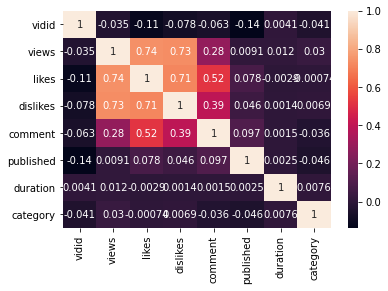

In [18]:
corr=df.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),annot=True)

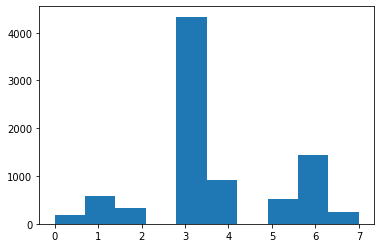

In [20]:
plt.hist(df['category'])
plt.show()

In [23]:
X=df.drop(['vidid'],axis=1)
X.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,457,1
1,1040132,8171,340,1047,1825,570,5
2,28534,31,11,1,1009,136,3
3,1316715,2284,250,274,116,262,6
4,1893173,2519,225,116,1892,31,1


In [25]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
views,8549.0,758635.261551,3.730342e+06,27.0,31380.0,157588.0,591344.0,225147758.0
likes,8549.0,2923.643701,1.001225e+04,0.0,87.0,446.0,1900.0,320072.0
dislikes,8549.0,262.876126,1.052374e+03,0.0,7.0,38.0,166.0,36023.0
comment,8549.0,472.864078,2.115437e+03,0.0,8.0,47.0,229.0,85250.0
published,8549.0,1306.212539,5.431521e+02,0.0,891.0,1435.0,1800.0,2105.0
duration,8549.0,1047.372675,2.340313e+03,0.0,186.0,328.0,724.0,42317.0
category,8549.0,3.611767,1.566363e+00,0.0,3.0,3.0,5.0,7.0


## Normalizing data

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [27]:
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [28]:
X[0:5]

array([[1.95520958e-03, 1.92237996e-02, 6.05168920e-03, 1.61524927e-02,
        9.75296912e-01, 1.07994423e-02, 1.42857143e-01],
       [4.61965571e-03, 2.55286311e-02, 9.43841435e-03, 1.22815249e-02,
        8.66983373e-01, 1.34697639e-02, 7.14285714e-01],
       [1.26614645e-04, 9.68532080e-05, 3.05360464e-04, 1.17302053e-05,
        4.79334917e-01, 3.21383841e-03, 4.28571429e-01],
       [5.84810690e-03, 7.13589442e-03, 6.94001055e-03, 3.21407625e-03,
        5.51068884e-02, 6.19136517e-03, 8.57142857e-01],
       [8.40846138e-03, 7.87010423e-03, 6.24600949e-03, 1.36070381e-03,
        8.98812352e-01, 7.32566108e-04, 1.42857143e-01]])

## Importing Model

In [49]:
ann=tensorflow.keras.models.load_model('./ann_ytbAdview.h5')
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 48        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


In [52]:
prediction=ann.predict(X)

In [53]:
prediction[0:5]

array([[2168.3901],
       [2351.8918],
       [1649.6431],
       [1312.1162],
       [2095.1416]], dtype=float32)

In [55]:
prediction_df=pd.DataFrame(data=prediction,columns=['Predicted AdViews'])

In [56]:
prediction_df.head()

,Predicted AdViews
0,2168.390137
1,2351.891846
2,1649.643066
3,1312.116211
4,2095.141602


In [58]:
prediction_df=prediction_df.round(0).astype(int)
prediction_df.head()

,Predicted AdViews
0,2168
1,2352
2,1650
3,1312
4,2095


## Export to CSV

In [59]:
prediction_df.to_csv('youtube_Adview_prediction.csv',index=False)